# Multiple dispatch

**Multiple dispatch** is a key feature of Julia, that we will explore in this notebook.

It helps make software fast. It also makes software extensible, programmable, and downright fun to play with. 

It may just herald a breakthrough for parallel computation.

1. Roman numerals
2. Functions
3. Parallel computing

## 1. Roman numerals (for fun)

Let's define a **new type** to represent a Roman numeral. For coding simplicity, we'll just deal with numbers between 0 and 9. 

**Exercise**: Extend this to larger numbers. (Recall that Roman numbers are a base-10 system!)

In [1]:
type Roman
    n::Int
end

Base.show(io::IO, r::Roman) = print(io, 'ⅰ' + (r.n - 1) % 10 )  # nice display; 'ⅰ' is a Unicode Roman numeral

We can create an object of this type as follows:

In [2]:
Roman(4)

ⅳ

In [3]:
Roman(14)

ⅳ

We would like to display it nicely, in Roman numerals:

In [5]:
v = [7 1 2 5 8 9]
Roman.(v)   # equivalent to map(Roman, v)  or  [Roman(x) for x in v]

1×6 Array{Roman,2}:
 ⅶ  ⅰ  ⅱ  ⅴ  ⅷ  ⅸ

In [6]:
Roman(4) + Roman(5)

LoadError: MethodError: no method matching +(::Roman, ::Roman)[0m
Closest candidates are:
  +(::Any, ::Any, [1m[31m::Any[0m, [1m[31m::Any...[0m) at operators.jl:138[0m

In [7]:
import Base.+
+(a::Roman, b::Roman) = Roman(a.n + b.n)

+ (generic function with 164 methods)

In [8]:
Roman(4) + Roman(5)

ⅸ

This **adds a new method** to the function `+`:

In [9]:
methods(+)

# 164 methods for generic function "+":
+(x::Bool, z::Complex{Bool}) at complex.jl:136
+(x::Bool, y::Bool) at bool.jl:48
+(x::Bool) at bool.jl:45
+{T<:AbstractFloat}(x::Bool, y::T) at bool.jl:55
+(x::Bool, z::Complex) at complex.jl:143
+(x::Bool, A::AbstractArray{Bool,N<:Any}) at arraymath.jl:91
+(x::Float32, y::Float32) at float.jl:239
+(x::Float64, y::Float64) at float.jl:240
+(z::Complex{Bool}, x::Bool) at complex.jl:137
+(z::Complex{Bool}, x::Real) at complex.jl:151
+(a::Float16, b::Float16) at float16.jl:136
+(x::Char, y::Integer) at char.jl:40
+(c::BigInt, x::BigFloat) at mpfr.jl:240
+(a::BigInt, b::BigInt, c::BigInt, d::BigInt, e::BigInt) at gmp.jl:298
+(a::BigInt, b::BigInt, c::BigInt, d::BigInt) at gmp.jl:291
+(a::BigInt, b::BigInt, c::BigInt) at gmp.jl:285
+(x::BigInt, y::BigInt) at gmp.jl:255
+(x::BigInt, c::Union{UInt16,UInt32,UInt64,UInt8}) at gmp.jl:310
+(x::BigInt, c::Union{Int16,Int32,Int64,Int8}) at gmp.jl:326
+(a::BigFloat, b::BigFloat, c::BigFloat, d::BigFloat, e::BigFloat) at mpfr.jl:388
+(a::BigFloat, b::BigFloat, c::BigFloat, d::BigFloat) at mpfr.jl:381
+(a::BigFloat, b::BigFloat, c::BigFloat) at mpfr.jl:375
+(x::BigFloat, c::BigInt) at mpfr.jl:236
+(x::BigFloat, y::BigFloat) at mpfr.jl:205
+(x::BigFloat, c::Union{UInt16,UInt32,UInt64,UInt8}) at mpfr.jl:212
+(x::BigFloat, c::Union{Int16,Int32,Int64,Int8}) at mpfr.jl:220
+(x::BigFloat, c::Union{Float16,Float32,Float64}) at mpfr.jl:228
+{T}(B::BitArray{2}, J::UniformScaling{T}) at linalg/uniformscaling.jl:38
+(a::Base.Pkg.Resolve.VersionWeights.VWPreBuildItem, b::Base.Pkg.Resolve.VersionWeights.VWPreBuildItem) at pkg/resolve/versionweight.jl:85
+(a::Base.Pkg.Resolve.VersionWeights.VWPreBuild, b::Base.Pkg.Resolve.VersionWeights.VWPreBuild) at pkg/resolve/versionweight.jl:131
+(a::Base.Pkg.Resolve.VersionWeights.VersionWeight, b::Base.Pkg.Resolve.VersionWeights.VersionWeight) at pkg/resolve/versionweight.jl:185
+(a::Base.Pkg.Resolve.MaxSum.FieldValues.FieldValue, b::Base.Pkg.Resolve.MaxSum.FieldValues.FieldValue) at pkg/resolve/fieldvalue.jl:44
+(x::Base.Dates.CompoundPeriod, y::Base.Dates.CompoundPeriod) at dates/periods.jl:314
+(x::Base.Dates.CompoundPeriod, y::Base.Dates.Period) at dates/periods.jl:312
+(x::Base.Dates.CompoundPeriod, y::Base.Dates.TimeType) at dates/periods.jl:359
+(dt::DateTime, z::Base.Dates.Month) at dates/arithmetic.jl:37
+(dt::DateTime, y::Base.Dates.Year) at dates/arithmetic.jl:13
+(x::DateTime, y::Base.Dates.Period) at dates/arithmetic.jl:64
+(x::Date, y::Base.Dates.Day) at dates/arithmetic.jl:62
+(x::Date, y::Base.Dates.Week) at dates/arithmetic.jl:60
+(dt::Date, z::Base.Dates.Month) at dates/arithmetic.jl:43
+(dt::Date, y::Base.Dates.Year) at dates/arithmetic.jl:17
+(a::Roman, b::Roman) at In[7]:2
+(y::AbstractFloat, x::Bool) at bool.jl:57
+{T<:Union{Int128,Int16,Int32,Int64,Int8,UInt128,UInt16,UInt32,UInt64,UInt8}}(x::T, y::T) at int.jl:32
+(x::Integer, y::Ptr) at pointer.jl:108
+(z::Complex, w::Complex) at complex.jl:125
+(z::Complex, x::Bool) at complex.jl:144
+(x::Real, z::Complex{Bool}) at complex.jl:150
+(x::Real, z::Complex) at complex.jl:162
+(z::Complex, x::Real) at complex.jl:163
+(x::Rational, y::Rational) at rational.jl:199
+(x::Integer, y::Char) at char.jl:41
+{N}(i::Integer, index::CartesianIndex{N}) at multidimensional.jl:58
+(c::Union{UInt16,UInt32,UInt64,UInt8}, x::BigInt) at gmp.jl:314
+(c::Union{Int16,Int32,Int64,Int8}, x::BigInt) at gmp.jl:327
+(c::Union{UInt16,UInt32,UInt64,UInt8}, x::BigFloat) at mpfr.jl:216
+(c::Union{Int16,Int32,Int64,Int8}, x::BigFloat) at mpfr.jl:224
+(c::Union{Float16,Float32,Float64}, x::BigFloat) at mpfr.jl:232
+(x::Irrational, y::Irrational) at irrationals.jl:88
+(x::Number) at operators.jl:115
+{T<:Number}(x::T, y::T) at promotion.jl:255
+(x::Number, y::Number) at promotion.jl:190
+(r1::OrdinalRange, r2::OrdinalRange) at operators.jl:505
+{T<:AbstractFloat}(r1::FloatRange{T}, r2::FloatRange{T}) at operators.jl:512
+{T<:AbstractFloat}(r1::LinSpace{T}, r2::LinSpace{T}) at operators.jl:

In [9]:
import Base.*

*(i::Roman, j::Roman) = Roman(i.n * j.n)                     # Multiply like a Roman

* (generic function with 150 methods)

In [10]:
Roman(3) * Roman(2)

ⅵ

But 

In [11]:
Roman(3) * 2

LoadError: MethodError: no method matching *(::Roman, ::Int64)[0m
Closest candidates are:
  *(::Any, ::Any, [1m[31m::Any[0m, [1m[31m::Any...[0m) at operators.jl:138
  *{T<:Number}([1m[31m::Bool[0m, ::T<:Number) at bool.jl:60
  *([1m[31m::Complex{Bool}[0m, ::Real) at complex.jl:159
  ...[0m

The simplest thing to do is to explicitly define multiplication of a `Roman` by a number. We can do it as we see fit:

In [13]:
*(i::Number, j::Roman) = eye(j.n) * i       # Multiply like a matrix constructor

*(i::Roman, j::Number) = "😄"^ ((i.n)*j)    # Multiply like a kid

* (generic function with 152 methods)

In [14]:
3 * Roman(3)

3×3 Array{Float64,2}:
 3.0  0.0  0.0
 0.0  3.0  0.0
 0.0  0.0  3.0

In [15]:
Roman(80) * 10

"😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄😄"

## Functions

In [19]:
*(α::Number,   g::Function) = x -> α * g(x)   # Scalar times function

*(f::Function, λ::Number)   = x -> f(λ * x)   # Scale the argument

*(f::Function, g::Function) = x -> f(g(x))    # Function composition  -- abuse of notation!  use \circ in Julia 0.6

* (generic function with 155 methods)

In [28]:
+(f::Function, g::Function) = x -> f(x) + g(x)

+ (generic function with 165 methods)

For example, the exponential function is defined as

$$\exp(x) = \sum_{n=0}^\infty \frac{1}{n!} x^n.$$

We can think of this just in terms of functions:

$$\exp = \sum_{n=0}^\infty \frac{1}{n!} \mathrm{pow}_n,$$

where $\mathrm{pow}_n(x) = x^n$.

In [43]:
pow(n) = x -> x^n

myexp = sum(1/factorial(big(n)) * pow(n) for n in 0:30)   # not efficient!

(::#27) (generic function with 1 method)

In [44]:
[myexp(10) exp(10)]

1×2 Array{BigFloat,2}:
 2.180200461378614162630685748191202199939573315399943687998273582165466940101167e+04  …  2.202646579480671789497137069702148437500000000000000000000000000000000000000000e+04

In [23]:
f = x -> x^2
f(10)

100

In [25]:
g = 3f
g(10)

300

In [27]:
(f^2)(10)  # since we defined multiplication of functions as composition

10000

In [9]:
using PyPlot;

INFO: Loading help data...


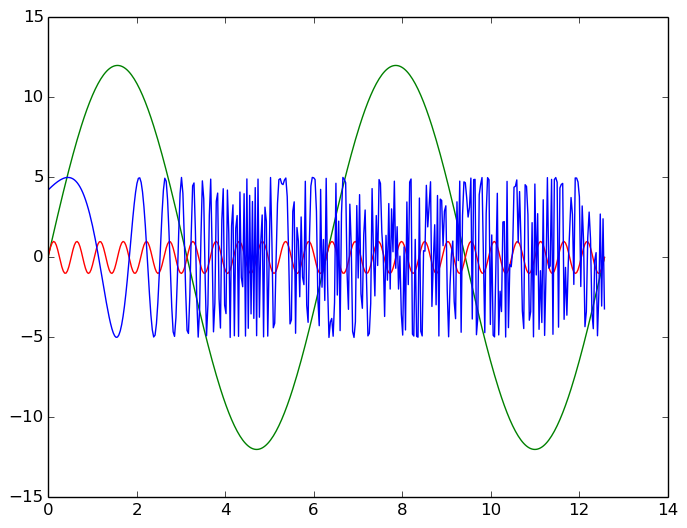

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f08ce796b10>

In [10]:
x=pi*(0:.01:4)

plot(x,(12*sin)(x),"g")
plot(x,(sin*12)(x),"r")
plot(x,(5*sin*exp)(x),"b")

<img src="https://lh4.googleusercontent.com/--z5eKJbB7sg/UffjL1iAd4I/AAAAAAAABOc/S_wDVyDOBfQ/gauss.jpg">

###  "Sin^2 phi is odious to me, even though Laplace made use of it; should  it be feared that sin^2 phi might become ambiguous, which would perhaps  never occur, or at most very rarely when speaking of sin(phi^2), well  then, let us write (sin phi)^2, but not sin^2 phi, which by analogy  should signify sin(sin phi)." -- Gauss

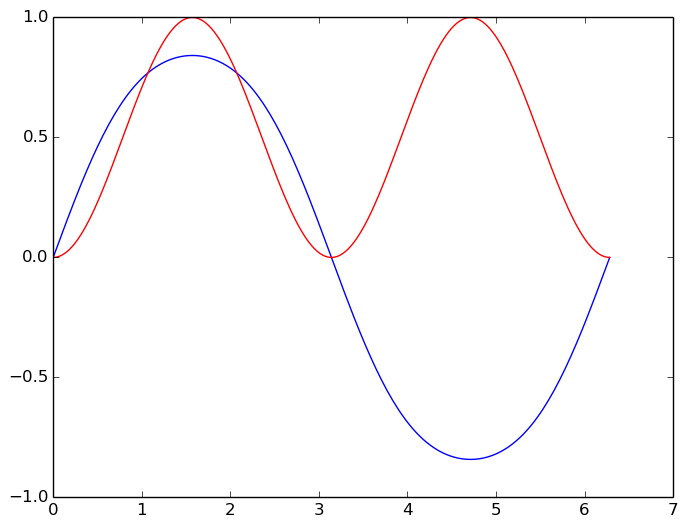

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f08ce6fe310>

In [11]:
x=(0:.01:2)*pi;
plot(x,(sin^2)(x),"b")     # Squaring just works, y=sin(sin(x)), Gauss would be pleased!
plot(x,sin(x).^2,"r")         

In [ ]:
f(a, b::Any) = "fallback"
f(a::Number, b::Number) = "a and b are both numbers"
f(a::Number, b) = "a is a number"
f(a, b::Number) = "b is a number"
f(a::Integer, b::Integer) = "a and b are both integers"